# Data Science Blog Post: Airline Passenger Satisfaction

Notebook for the Data Science Blog Post project from the Udacity Data Scientist Nanodegree Program.

The data used in this project was retrieved from Kaggle at: https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction.

The Creator of this dataset is TJ Klein: https://www.kaggle.com/teejmahal20.



#### Reading the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [2]:
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


Both datasets have a column named `Unnamed: 0` column that is a index, therefore both should be dropped. Also both datasets should be merged and then separated into train and test.

Joining both dataframes

In [4]:
df = pd.concat([df_train, df_test])
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Drop the `Unnamed: 0` column

In [5]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     12988

Renaming the column headers to lower case and replacing every space with an underscore

In [7]:
df.columns = df.columns.map(lambda x: x.replace(' ','_').lower())
df.columns

Index(['id', 'gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

In [8]:
df[df['arrival_delay_in_minutes'].isna()]

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24072,21780,Male,Loyal Customer,45,Business travel,Eco,352,5,1,1,...,5,1,1,1,3,2,5,26,NaN,satisfied
24133,64934,Female,Loyal Customer,29,Business travel,Business,3873,3,3,3,...,3,3,4,4,4,3,3,19,NaN,neutral or dissatisfied
24301,125688,Male,disloyal Customer,38,Business travel,Business,759,3,3,3,...,4,3,3,5,5,4,4,0,NaN,satisfied
25128,64706,Female,Loyal Customer,52,Business travel,Business,3659,5,5,5,...,5,5,5,5,3,5,3,0,NaN,satisfied


The only column with missing values is `arrival_delay_in_minutes`. Therefore it is going to be filled with the mean.

In [9]:
df['arrival_delay_in_minutes'].fillna(df['arrival_delay_in_minutes'].mean(), inplace=True)
df['arrival_delay_in_minutes'].value_counts()

0.0      72753
1.0       2747
2.0       2587
3.0       2442
4.0       2373
         ...  
604.0        1
457.0        1
502.0        1
429.0        1
333.0        1
Name: arrival_delay_in_minutes, Length: 473, dtype: int64

In [10]:
df['arrival_delay_in_minutes'].isnull().sum()

0

The categorical variables in this dataset are: `Gender`, `Customer Type`, `Type of Travel`, and `Class`.

In [11]:
df.gender.value_counts()

Female    65899
Male      63981
Name: gender, dtype: int64

In [12]:
df.customer_type.value_counts()

Loyal Customer       106100
disloyal Customer     23780
Name: customer_type, dtype: int64

In [13]:
df.type_of_travel.value_counts()

Business travel    89693
Personal Travel    40187
Name: type_of_travel, dtype: int64

In [14]:
df['class'].value_counts()

Business    62160
Eco         58309
Eco Plus     9411
Name: class, dtype: int64

## Questions to pose:

#### What are the characteristics of Male and Female customers?
#### Which type of customer is more prone to be satisfied with the service offered?
#### How well can we predict if a customer will be satisfied with the service offered or not?

#### Characteristics of Male and Female customers

In [15]:
df.groupby(by='gender')['customer_type'].value_counts()

gender  customer_type    
Female  Loyal Customer       53056
        disloyal Customer    12843
Male    Loyal Customer       53044
        disloyal Customer    10937
Name: customer_type, dtype: int64

In [16]:
df.groupby(by='gender')['type_of_travel'].value_counts()

gender  type_of_travel 
Female  Business travel    45794
        Personal Travel    20105
Male    Business travel    43899
        Personal Travel    20082
Name: type_of_travel, dtype: int64

In [17]:
df.groupby(by='gender')['class'].value_counts()

gender  class   
Female  Business    31263
        Eco         29670
        Eco Plus     4966
Male    Business    30897
        Eco         28639
        Eco Plus     4445
Name: class, dtype: int64

In [18]:
female_loyal = len(df[(df['gender'] == "Female") & (df['customer_type'] == "Loyal Customer")])
female = len(df[(df['gender'] == "Female")])

female_loyal_percentage = female_loyal/female
female_disloyal_percentage = 1 - female_loyal_percentage

male_loyal = len(df[(df['gender'] == "Male") & (df['customer_type'] == "Loyal Customer")])
male = len(df[(df['gender'] == "Male")])

male_loyal_percentage = male_loyal/male
male_disloyal_percentage = 1 - male_loyal_percentage

print(f'Female Loyal Customer: {female_loyal_percentage*100:.2f}%')
print(f'Female Disloyal Customer: {female_disloyal_percentage*100:.2f}%')
print(f'Male Loyal Customer: {male_loyal_percentage*100:.2f}%')
print(f'Male Disloyal Customer: {male_disloyal_percentage*100:.2f}%')

Female Loyal Customer: 80.51%
Female Disloyal Customer: 19.49%
Male Loyal Customer: 82.91%
Male Disloyal Customer: 17.09%


In [19]:
female_personal = len(df[(df['gender'] == "Female") & (df['type_of_travel'] == "Personal Travel")])
female = len(df[(df['gender'] == "Female")])

female_personal_percentage = female_personal/female
female_business_percentage = 1 - female_personal_percentage

male_personal = len(df[(df['gender'] == "Male") & (df['type_of_travel'] == "Personal Travel")])
male = len(df[(df['gender'] == "Male")])

male_personal_percentage = male_personal/male
male_business_percentage = 1 - male_personal_percentage

print(f'Female Personal Travel: {female_personal_percentage*100:.2f}%')
print(f'Female Business Travel: {female_business_percentage*100:.2f}%')
print(f'Male Personal Travel: {male_personal_percentage*100:.2f}%')
print(f'Male Business Travel: {male_business_percentage*100:.2f}%')

Female Personal Travel: 30.51%
Female Business Travel: 69.49%
Male Personal Travel: 31.39%
Male Business Travel: 68.61%


In [20]:
female_eco = len(df[(df['gender'] == "Female") & (df['class'] == "Eco")])
female_eco_plus = len(df[(df['gender'] == "Female") & (df['class'] == "Eco Plus")])
female = len(df[(df['gender'] == "Female")])

female_eco_percentage = female_eco/female
female_eco_plus_percentage = female_eco_plus/female
female_business_class_percentage = 1 - (female_eco_percentage + female_eco_plus_percentage)

male_eco = len(df[(df['gender'] == "Male") & (df['class'] == "Eco")])
male_eco_plus = len(df[(df['gender'] == "Male") & (df['class'] == "Eco Plus")])
male = len(df[(df['gender'] == "Male")])

male_eco_percentage = male_eco/male
male_eco_plus_percentage = male_eco_plus/male
male_business_class_percentage = 1 - (male_eco_percentage + male_eco_plus_percentage)

print(f'Female Eco Class: {female_eco_percentage*100:.2f}%')
print(f'Female Eco Plus Class: {female_eco_plus_percentage*100:.2f}%')
print(f'Female Business Class: {female_business_class_percentage*100:.2f}%')
print(f'Male Eco Class: {male_eco_percentage*100:.2f}%')
print(f'Male Eco Plus Class: {male_eco_plus_percentage*100:.2f}%')
print(f'Male Business Class: {male_business_class_percentage*100:.2f}%')

Female Eco Class: 45.02%
Female Eco Plus Class: 7.54%
Female Business Class: 47.44%
Male Eco Class: 44.76%
Male Eco Plus Class: 6.95%
Male Business Class: 48.29%


#### Satisfaction for each category

In [21]:
business_travel_satisfaction = len(df[(df['type_of_travel'] == "Business travel") & (df['satisfaction'] == "satisfied")])
business_travel = len(df[(df['type_of_travel'] == "Business travel")])

personal_travel_satisfaction = len(df[(df['type_of_travel'] == "Personal Travel") & (df['satisfaction'] == "satisfied")])
personal_travel = len(df[(df['type_of_travel'] == "Personal Travel")])

business_travel_satisfaction_percentage = business_travel_satisfaction/business_travel
business_travel_dissatisfaction_percentage = 1 - business_travel_satisfaction_percentage

personal_travel_satisfaction_percentage = personal_travel_satisfaction/personal_travel
personal_travel_dissatisfaction_percentage = 1 - personal_travel_satisfaction_percentage

print(f'Business Travel Satisfaction: {business_travel_satisfaction_percentage*100:.2f}%')
print(f'Business Travel Dissatisfaction: {business_travel_dissatisfaction_percentage*100:.2f}%')
print(f'Personal Travel Satisfaction: {personal_travel_satisfaction_percentage*100:.2f}%')
print(f'Personal Travel Dissatisfaction: {personal_travel_dissatisfaction_percentage*100:.2f}%')

Business Travel Satisfaction: 58.37%
Business Travel Dissatisfaction: 41.63%
Personal Travel Satisfaction: 10.13%
Personal Travel Dissatisfaction: 89.87%


In [22]:
female_satisfaction = len(df[(df['gender'] == "Female") & (df['satisfaction'] == "satisfied")])
female = len(df[(df['gender'] == "Female")])

male_satisfaction = len(df[(df['gender'] == "Male") & (df['satisfaction'] == "satisfied")])
male = len(df[(df['gender'] == "Male")])

female_satisfaction_percentage = female_satisfaction/female
female_dissatisfaction_percentage = 1 - female_satisfaction_percentage

male_satisfaction_percentage = male_satisfaction/male
male_dissatisfaction_percentage = 1 - male_satisfaction_percentage

print(f'Female Satisfaction: {female_satisfaction_percentage*100:.2f}%')
print(f'Female Dissatisfaction: {female_dissatisfaction_percentage*100:.2f}%')
print(f'Male Satisfaction: {male_satisfaction_percentage*100:.2f}%')
print(f'Male Dissatisfaction: {male_dissatisfaction_percentage*100:.2f}%')

Female Satisfaction: 42.90%
Female Dissatisfaction: 57.10%
Male Satisfaction: 44.01%
Male Dissatisfaction: 55.99%


In [23]:
business_class_satisfaction = len(df[(df['class'] == "Business") & (df['satisfaction'] == "satisfied")])
business_class = len(df[(df['class'] == "Business")])

eco_satisfaction = len(df[(df['class'] == "Eco") & (df['satisfaction'] == "satisfied")])
eco = len(df[(df['class'] == "Eco")])

eco_plus_satisfaction = len(df[(df['class'] == "Eco Plus") & (df['satisfaction'] == "satisfied")])
eco_plus = len(df[(df['class'] == "Eco Plus")])

business_class_satisfaction_percentage = business_class_satisfaction/business_class
business_class_dissatisfaction_percentage = 1 - business_class_satisfaction_percentage

eco_satisfaction_percentage = eco_satisfaction/eco
eco_dissatisfaction_percentage = 1 - eco_satisfaction_percentage

eco_plus_satisfaction_percentage = eco_plus_satisfaction/eco_plus
eco_plus_dissatisfaction_percentage = 1 - eco_plus_satisfaction_percentage

print(f'Business Class Satisfaction: {business_class_satisfaction_percentage*100:.2f}%')
print(f'Business Class Dissatisfaction: {business_class_dissatisfaction_percentage*100:.2f}%')
print(f'Eco Class Satisfaction: {eco_satisfaction_percentage*100:.2f}%')
print(f'Eco Class Dissatisfaction: {eco_dissatisfaction_percentage*100:.2f}%')
print(f'Eco Plus Class Satisfaction: {eco_plus_satisfaction_percentage*100:.2f}%')
print(f'Eco Plus Class Dissatisfaction: {eco_plus_dissatisfaction_percentage*100:.2f}%')

Business Class Satisfaction: 69.44%
Business Class Dissatisfaction: 30.56%
Eco Class Satisfaction: 18.77%
Eco Class Dissatisfaction: 81.23%
Eco Plus Class Satisfaction: 24.64%
Eco Plus Class Dissatisfaction: 75.36%


In [32]:
loyal_satisfaction = len(df[(df['customer_type'] == "Loyal Customer") & (df['satisfaction'] == "satisfied")])
loyal = len(df[df['customer_type'] == "Loyal Customer"])

disloyal_satisfaction = len(df[(df['customer_type'] == "disloyal Customer") & (df['satisfaction'] == "satisfied")])
disloyal = len(df[df['customer_type'] == "disloyal Customer"])

loyal_satisfaction_percentage = loyal_satisfaction/loyal
loyal_dissatisfaction_percentage = 1 - loyal_satisfaction_percentage

disloyal_satisfaction_percentage = disloyal_satisfaction/disloyal
disloyal_dissatisfaction_percentage = 1 - disloyal_satisfaction_percentage

print(f'Loyal costumer satisfaction: {loyal_satisfaction_percentage*100:.2f}%')
print(f'Loyal costumer dissatisfaction: {loyal_dissatisfaction_percentage*100:.2f}%')
print(f'Disloyal costumer satisfaction: {disloyal_satisfaction_percentage*100:.2f}%')
print(f'Disloyal costumer dissatisfaction: {disloyal_dissatisfaction_percentage*100:.2f}%')

Loyal costumer satisfaction: 47.81%
Loyal costumer dissatisfaction: 52.19%
Disloyal costumer satisfaction: 23.97%
Disloyal costumer dissatisfaction: 76.03%


#### Predicting satisfaction

Encoding categorical variables

In [24]:
#Mapping Satisfaction
df['satisfaction'] = df['satisfaction'].map({"satisfied": 1, "neutral or dissatisfied": 0})

#Mapping Class
df['class'] = df['class'].map({"Business": 2, "Eco Plus": 1, "Eco": 0})

In [25]:
df.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,1,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,2,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,2,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,2,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,2,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [26]:
y = df['satisfaction']

new_df = df.drop(columns='satisfaction')
X = pd.get_dummies(new_df, drop_first=True)
X.drop('id', axis=1, inplace=True)

In [27]:
X

,age,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,...,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel
0,13,1,460,3,4,3,1,5,3,5,...,3,4,4,5,5,25,18.0,1,0,1
1,25,2,235,3,2,3,3,1,3,1,...,5,3,1,4,1,1,6.0,1,1,0
2,26,2,1142,2,2,2,2,5,5,5,...,3,4,4,4,5,0,0.0,0,0,0
3,25,2,562,2,5,5,5,2,2,2,...,5,3,1,4,2,11,9.0,0,0,0
4,61,2,214,3,3,3,3,4,5,5,...,4,4,3,3,3,0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,34,2,526,3,3,3,1,4,3,4,...,2,4,4,5,4,0,0.0,1,1,0
25972,23,2,646,4,4,4,4,4,4,4,...,5,5,5,5,4,0,0.0,1,0,0
25973,17,0,828,2,5,1,5,2,1,2,...,3,4,5,4,2,0,0.0,0,0,1
25974,14,2,1127,3,3,3,3,4,4,4,...,2,5,4,5,4,0,0.0,1,0,0


In [28]:
y

0        0
1        0
2        1
3        0
4        1
        ..
25971    0
25972    1
25973    0
25974    1
25975    0
Name: satisfaction, Length: 129880, dtype: int64

Training the ML model

In [29]:
#Separate the set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28)

In [30]:
#Normalizing continuous variables

scaler = MinMaxScaler(feature_range=(0,1))

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
LR_model = LogisticRegression()

#Create param grid

param_grid = [
    {'penalty': ["l1", "l2"],
     'C': np.logspace(-4, 4, 20),
    }
]

#Create grid search object

lr_model_grid = GridSearchCV(LR_model, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)

#Fit on data

lr_model_grid.fit(X_train, y_train)

print("tuned hyperparameters: ", lr_model_grid.best_params_)
print("score: ", lr_model_grid.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\Gabriel\anaconda3\envs\data_sci_blog_post\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.84563774        nan 0.85319416        nan 0.86123456
        nan 0.86785606        nan 0.87184876        nan 0.87283867
        nan 0.87360862        nan 0.87335564        nan 0.87360862
        nan 0.8738066         nan 0.8737956         nan 0.8737956
        nan 0.87371861        nan 0.87370761        nan 0.87366361
        nan 0.87367461        nan 0.87371861        nan 0.87368561
        nan 0.87366361        nan 0.87367461]
  warnings.warn(


tuned hyperparameters:  {'C': 0.615848211066026, 'penalty': 'l2'}
score:  0.8738066023728696


In [32]:
lr_model = LogisticRegression(**lr_model_grid.best_params_)
lr_model.fit(X_train, y_train)

y_preds = lr_model.predict(X_test)
target_names = ['Neutral or Dissatisfied', 'Satisfied']
print(classification_report(y_test, y_preds, target_names=target_names))

                         precision    recall  f1-score   support

Neutral or Dissatisfied       0.88      0.90      0.89     22036
              Satisfied       0.87      0.84      0.85     16928

               accuracy                           0.87     38964
              macro avg       0.87      0.87      0.87     38964
           weighted avg       0.87      0.87      0.87     38964



In [33]:
rfc_model = RandomForestClassifier(random_state=28)

param_grid = [
    {'n_estimators': list(range(10, 101, 10)),
     'max_features': list(range(6, 32, 5))}
]

rfc_model_grid = GridSearchCV(rfc_model, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)

rfc_model_grid.fit(X_train, y_train)
print("tuned hyperparameters: ", rfc_model_grid.best_params_)
print("score: ", rfc_model_grid.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\Gabriel\anaconda3\envs\data_sci_blog_post\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.95802718 0.96047999 0.96135993 0.96242685 0.96269083 0.96294381
 0.96285582 0.9630428  0.96308679 0.96313079 0.95986403 0.96188787
 0.96259182 0.96298779 0.9629108  0.96305379 0.96335077 0.96353775
 0.96380173 0.96377973 0.95927009 0.9617009  0.96228385 0.96253682
 0.96261382 0.96325177 0.96308679 0.96347175 0.96350475 0.96331777
 0.95765321 0.96017202 0.96055698 0.96080996 0.96100794 0.96116193
 0.96123893 0.96137092 0.96139291 0.96166789        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan]
  warnings.warn(


tuned hyperparameters:  {'max_features': 11, 'n_estimators': 90}
score:  0.9638017291524534


In [34]:
rfc = RandomForestClassifier(**rfc_model_grid.best_params_)
rfc.fit(X_train,y_train)

y_preds_rfc = rfc.predict(X_test)

print(classification_report(y_test, y_preds_rfc, target_names=target_names))

                         precision    recall  f1-score   support

Neutral or Dissatisfied       0.96      0.98      0.97     22036
              Satisfied       0.97      0.94      0.96     16928

               accuracy                           0.96     38964
              macro avg       0.97      0.96      0.96     38964
           weighted avg       0.96      0.96      0.96     38964



## Graphical Analysis

#### Characteristics of Male and Female customers

#### Percentage of Male and Female customers

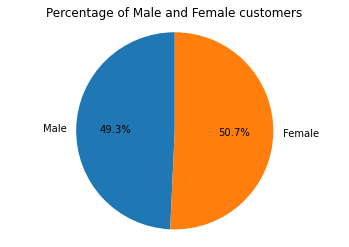

In [24]:
labels = 'Male', 'Female'
sizes = [len(df[(df['gender'] == "Male")])/df.shape[0], len(df[(df['gender'] == "Female")])/df.shape[0]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
ax1.set_title("Percentage of Male and Female customers")

plt.show()

#### Customer type by gender

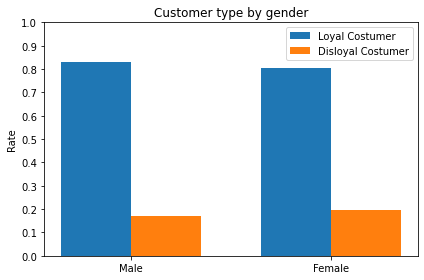

In [25]:
labels = ['Male', 'Female']
loyal_percentages = [male_loyal_percentage, female_loyal_percentage]
disloyal_percentages =[male_disloyal_percentage, female_disloyal_percentage]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, loyal_percentages, width, label='Loyal Costumer')
rects2 = ax.bar(x + width/2, disloyal_percentages, width, label='Disloyal Costumer')

ax.set_ylabel('Rate')
ax.set_title('Customer type by gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.legend()

fig.tight_layout()

plt.show()

#### Type of travel by gender

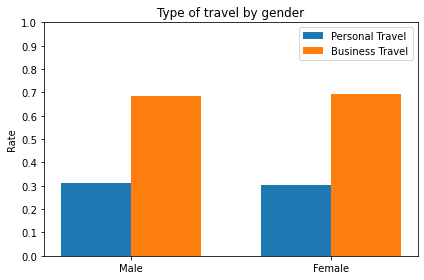

In [26]:
labels = ['Male', 'Female']
personal_percentages = [male_personal_percentage, female_personal_percentage]
business_percentages =[male_business_percentage, female_business_percentage]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, personal_percentages, width, label='Personal Travel')
rects2 = ax.bar(x + width/2, business_percentages, width, label='Business Travel')

ax.set_ylabel('Rate')
ax.set_title('Type of travel by gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.legend()

fig.tight_layout()

plt.show()

#### Class by Gender

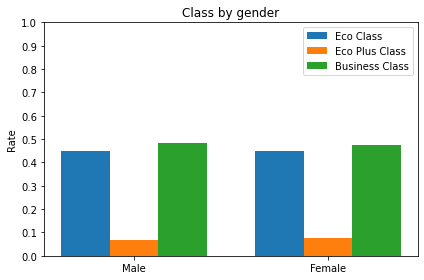

In [27]:
labels = ['Male', 'Female']
eco_percentages = [male_eco_percentage, female_eco_percentage]
eco_plus_percentages =[male_eco_plus_percentage, female_eco_plus_percentage]
business_class_percentages =[male_business_class_percentage, female_business_class_percentage]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x, eco_percentages, width, label='Eco Class')
rects1 = ax.bar(x + width, eco_plus_percentages, width, label='Eco Plus Class')
rects3 = ax.bar(x + 2*width, business_class_percentages, width, label='Business Class')

ax.set_ylabel('Rate')
ax.set_title('Class by gender')
ax.set_xticks(x + width)
ax.set_xticklabels(labels)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.legend()

fig.tight_layout()

plt.show()

#### Satisfaction for each Category

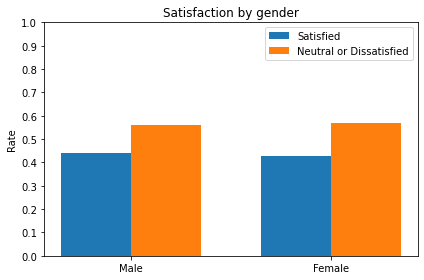

In [28]:
labels = ['Male', 'Female']
satisfied_percentages = [male_satisfaction_percentage, female_satisfaction_percentage]
dissatisfied_percentages =[male_dissatisfaction_percentage, female_dissatisfaction_percentage]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, satisfied_percentages, width, label='Satisfied')
rects2 = ax.bar(x + width/2, dissatisfied_percentages, width, label='Neutral or Dissatisfied')

ax.set_ylabel('Rate')
ax.set_title('Satisfaction by gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.legend()

fig.tight_layout()

plt.show()

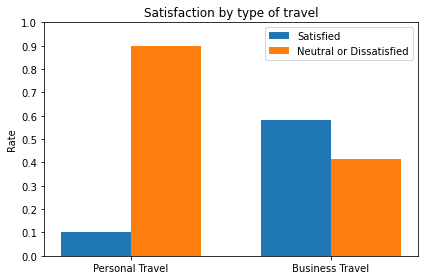

In [29]:
labels = ['Personal Travel', 'Business Travel']
travel_satisfied_percentages = [personal_travel_satisfaction_percentage, business_travel_satisfaction_percentage]
travel_dissatisfied_percentages =[personal_travel_dissatisfaction_percentage, business_travel_dissatisfaction_percentage]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, travel_satisfied_percentages, width, label='Satisfied')
rects2 = ax.bar(x + width/2, travel_dissatisfied_percentages, width, label='Neutral or Dissatisfied')

ax.set_ylabel('Rate')
ax.set_title('Satisfaction by type of travel')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.legend()

fig.tight_layout()

plt.show()

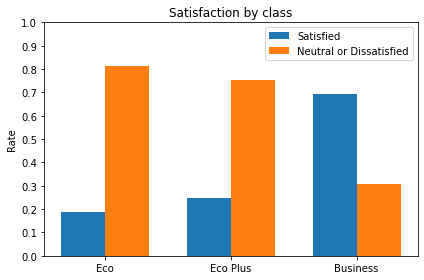

In [30]:
labels = ['Eco', 'Eco Plus', 'Business']
class_satisfaction_percentages = [eco_satisfaction_percentage, eco_plus_satisfaction_percentage,
                                  business_class_satisfaction_percentage]
class_dissatisfaction_percentages = [eco_dissatisfaction_percentage, eco_plus_dissatisfaction_percentage,
                                     business_class_dissatisfaction_percentage]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, class_satisfaction_percentages, width, label='Satisfied')
rects2 = ax.bar(x + width/2, class_dissatisfaction_percentages, width, label='Neutral or Dissatisfied')

ax.set_ylabel('Rate')
ax.set_title('Satisfaction by class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.legend()

fig.tight_layout()

plt.show()

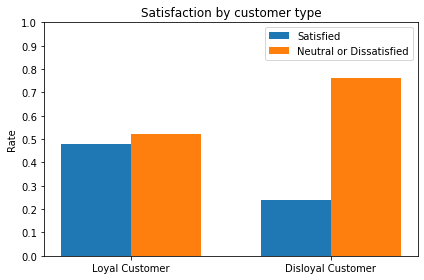

In [33]:
labels = ['Loyal Customer', 'Disloyal Customer']
customer_type_satisfied_percentages = [loyal_satisfaction_percentage, disloyal_satisfaction_percentage]
customer_type_dissatisfied_percentages =[loyal_dissatisfaction_percentage, disloyal_dissatisfaction_percentage]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, customer_type_satisfied_percentages, width, label='Satisfied')
rects2 = ax.bar(x + width/2, customer_type_dissatisfied_percentages, width, label='Neutral or Dissatisfied')

ax.set_ylabel('Rate')
ax.set_title('Satisfaction by customer type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.legend()

fig.tight_layout()

plt.show()